<a href="https://colab.research.google.com/github/Jevs9/Inmersion_Datos1/blob/main/INMERSION_DATOS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 02** <br>
Biblioteca matplotlib y [seaborn]https://seaborn.pydata.org/)<br>
más sobre [String](https://docs.python.org/es/3/library/string.html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/1_clase01/material/inmuebles_bogota.csv')
columnas = {'Baños':'Banos', 'Área':'Area'}
inmuebles = inmuebles.rename(columns = columnas)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


E lproblema planteado es calcular el valor económico del metro cuadrado. Como se nota en la linea de código anterior la columna Valor tiene datos de tipo object (combinación de caracteres alfanuméricos)

In [ ]:
inmuebles.Valor[0]

'$ 360.000.000'

In [ ]:
type(inmuebles.Valor[0])

str

Vamos a tratar de convertir los valores string de la columna VALOR a valores numericos, esto con el fin de poder operar con los valores contenidos en cada celda.

In [ ]:
inmuebles.Valor[0].split()

['$', '360.000.000']

Con la propiedad split() se separa una cadena de texto deacuerdo a un prámetro establecido, en caso de NO definir un párámetro se tiene por defecto "espacio"

In [ ]:
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Con el .str podemos aplicar la propiedad split a todos los elementos de la columna. con el expand(true) me devuuelve la conversión que hace en un dataframe (esto es, el valor de peso en una columna y el número con puntos en otra) si no colocamos el expand en True se retorna una serie como se ve a continuación:

In [ ]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

Vamos añadir dos nuevas columnas a dataframe principal, una con el símbolo de pesos y otra con el valor de moneda.

In [ ]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
4142,Casa,Casa en venta en Capellania,6,4,240,Capellania,Modelia,$ 880.000.000,$,880.000.000
8621,Apartamento,Apartamento en venta en Engativa,3,1,59,Engativa,Engativá,$ 260.000.000,$,260.000.000
3843,Apartamento,Apartamento en venta en Mazuren,3,2,120,Mazuren,El Prado,$ 390.000.000,$,390.000.000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Aún NO se tiene como valor numérico los valores de la columana Precio, vamos a sustiruir esos puntos. OJO con el regex del final

In [ ]:
inmuebles['Precio'] = inmuebles.Precio.str.replace('.','', regex = True)

Para tomar solo dos columnas del dataframe original debo abrir doble [

In [ ]:
inmuebles[['Barrio', 'Precio']]

,Barrio,Precio
0,Zona Noroccidental,360000000
1,Castilla,670000000
2,Chico Reservado,1120000000
3,Usaquén,890000000
4,Bella Suiza,970000000
...,...,...
9515,Kennedy,290000000
9516,Parque Central Bavaria,670000000
9517,Restrepo,900000000
9518,Engativa,335000000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Se va a transformar el tipo de dato de object a tipo numérico (float)

In [ ]:
inmuebles['Precio_Millones'] = inmuebles.Precio.astype('float')/1000000

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tipo             9520 non-null   object 
 1   Descripcion      9520 non-null   object 
 2   Habitaciones     9520 non-null   int64  
 3   Banos            9520 non-null   int64  
 4   Area             9520 non-null   int64  
 5   Barrio           9520 non-null   object 
 6   UPZ              9478 non-null   object 
 7   Valor            9520 non-null   object 
 8   Moneda           9520 non-null   object 
 9   Precio           9520 non-null   object 
 10  Precio_Millones  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles[['Barrio', 'Precio_Millones']]

,Barrio,Precio_Millones
0,Zona Noroccidental,360.00
1,Castilla,670.00
2,Chico Reservado,1120.00
3,Usaquén,890.00
4,Bella Suiza,970.00
...,...,...
9515,Kennedy,290.00
9516,Parque Central Bavaria,670.00
9517,Restrepo,900.00
9518,Engativa,335.00


Patra sacar diferentes tipos de valores estadisticos a toda nuestra dataframe podemos utilizar lo siguiente:

In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Mejorando posiciones decimales para facilitar la lectura de los datos.

In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


Este puede ser un error en la inserción de datos.

Se va a mirar el comportamiento del valor económico de los inmuebles, utilizando un histograma, donde el eje x representa el valor en millones de pesos y el eje y la frecuencia en la que están estos inmuebles. De la gráfica se infiere que la mayoría de inmuebles están entre 0 y 2000 millones de pesos.

Los bins amplian en rango de visualización

<Axes: ylabel='Frequency'>

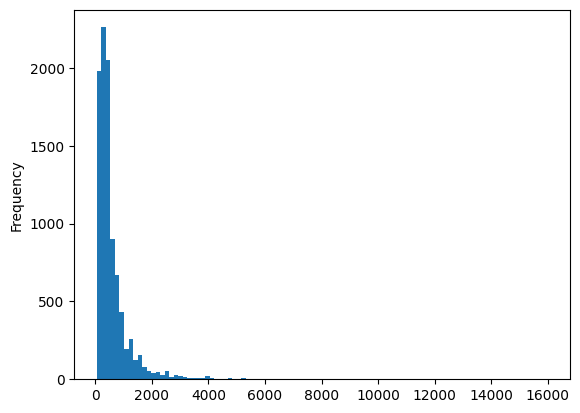

In [ ]:
inmuebles['Precio_Millones'].plot.hist(bins=100)

Para mejorar la visualización de las gráficas vamos a importar dos nuevas librerias:
Tener en cuenta las abreviaciones como buena práctica.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a crear un "lienzo" para poner nuestras nuevas gráficas. esto se hace con figure y el parametro figsize donde dimensiono el "lienzo" deacuerdo a mi necesidad.

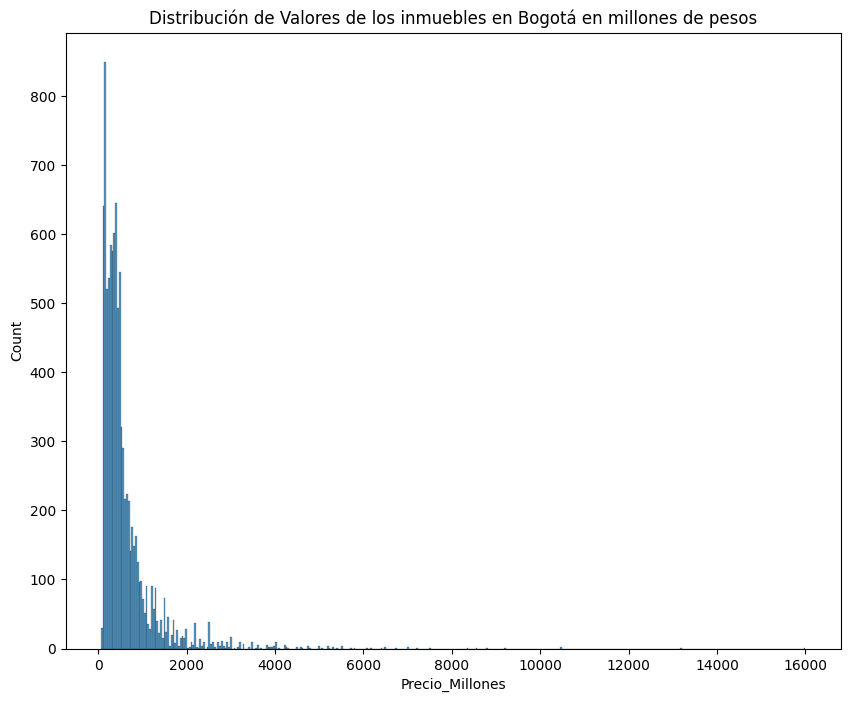

In [ ]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.show()

Colocando límites en el eje x  de nuestra gráfica:

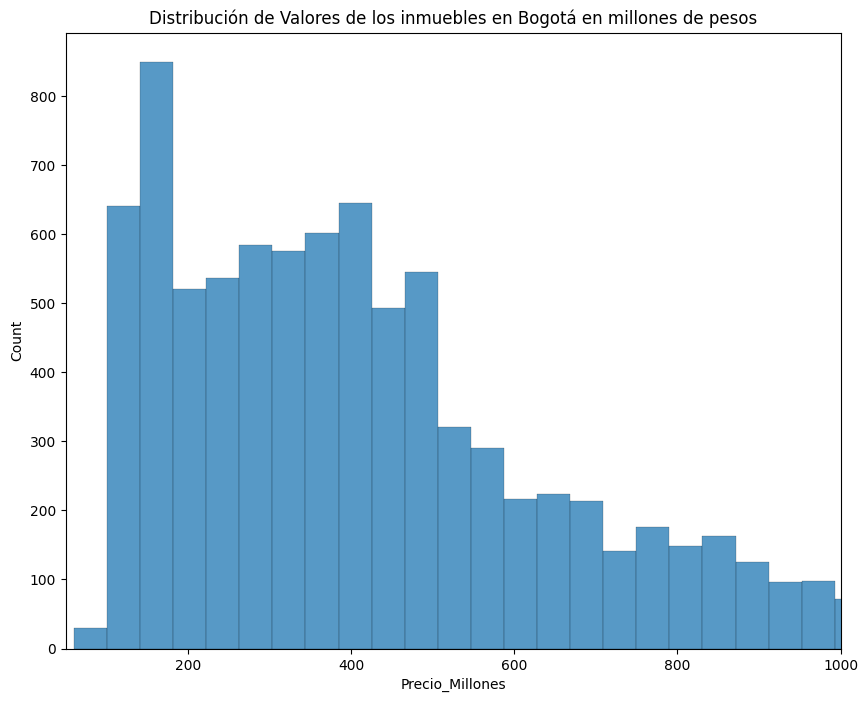

In [ ]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.show()

Agrgando una curva de densidad que nos ayudará en la interpretación.

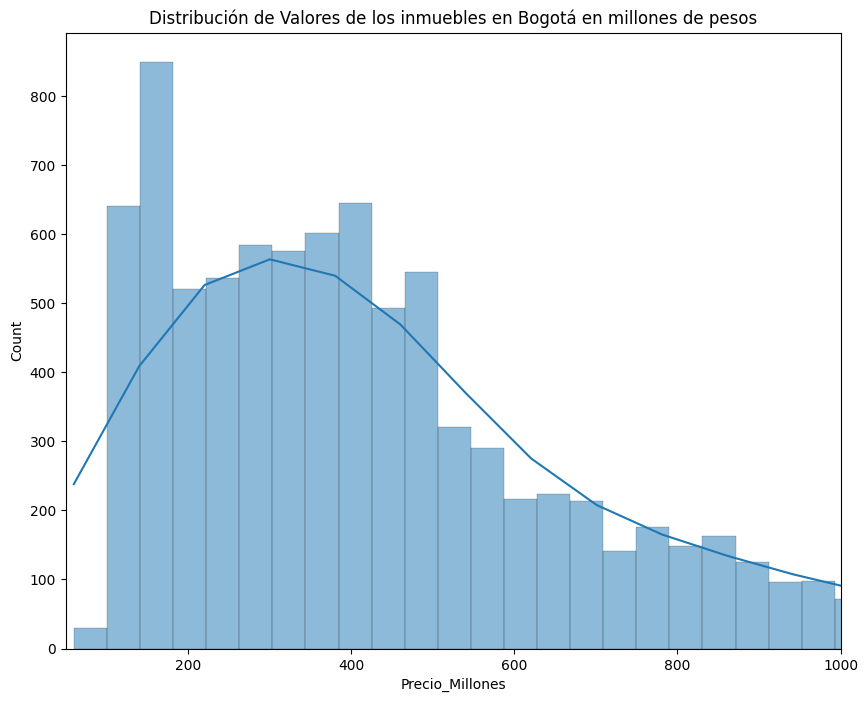

In [ ]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones', kde=True)
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.show()

Para guardar un gráfico se utiliza la función savefig donde hay que pasar como parámetro la ruta donde se quiere guardar y el formato.

Adicional se va incluir en la gráfica otro elemento que está relacionado con el tipo de inmuebles, esto se hace con el parámetro hue

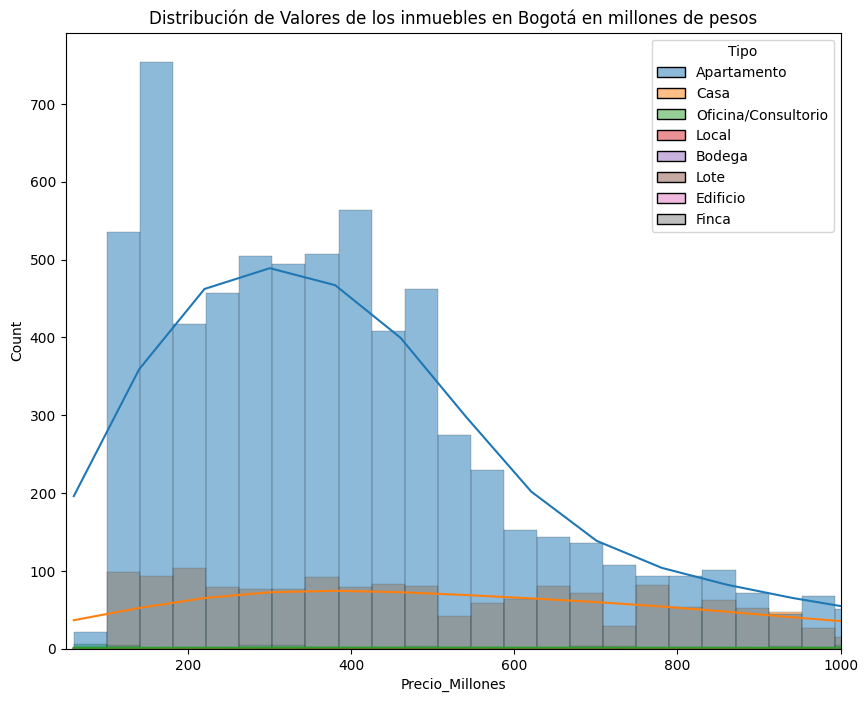

In [ ]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles.png', format='png')
plt.show()

#DESAFIOS

1.   HACER EL HISTOGRAMA UTILIZANDO SOLO TRES TIPOS DE INMUEBLES, APARTAMENTOS, FINCAS Y CASAS
2.   REFINAR EL GRÁFICO EN CUANTO A LABELS Y SACAR UNA CONCLUSIÓN O ANALISIS DEL GRÁFICO
3. PRECIO DEL M2 POR BARRIO Y MOSTRARLO EN UN GRÁFICO.


##1. Histograma con filtro de casas, apartamentos y fincas

In [ ]:
inmuebles_filtrado = inmuebles[inmuebles['Tipo'].isin([ 'Casa', 'Apartamento','Finca'])]
inmuebles_filtrado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00
...,...,...,...,...,...,...,...,...,...,...,...
9514,Casa,Casa en venta en Kennedy,4,2,240,Kennedy,Kennedy Central,$ 555.000.000,$,555000000,555.00
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00


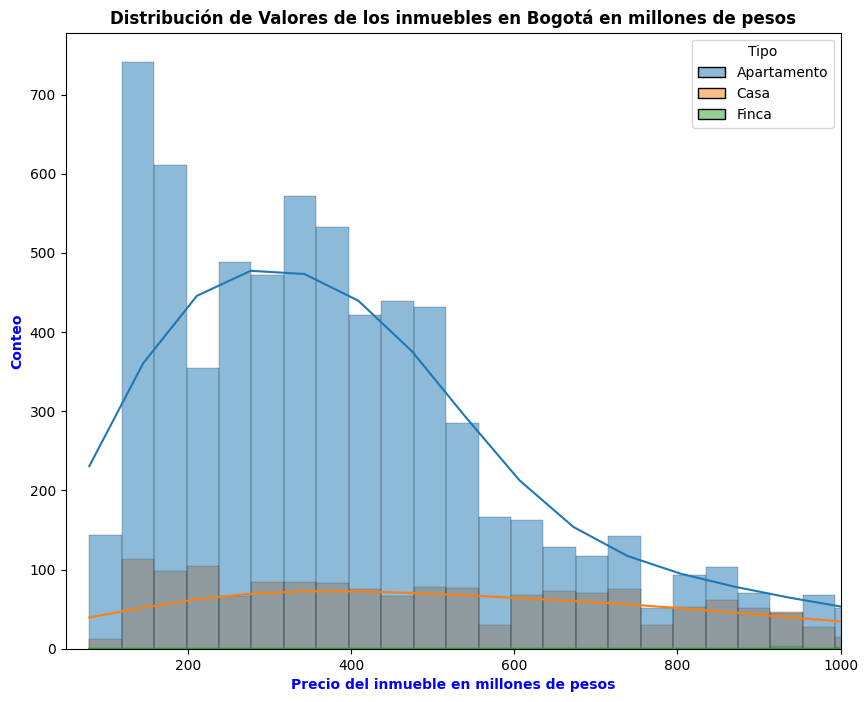

In [ ]:
from numpy import stack
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles_filtrado, x='Precio_Millones', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos', fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel('Precio del inmueble en millones de pesos', color = 'blue', fontweight = 'bold')
ax.set_ylabel('Conteo', color = 'blue', fontweight = 'bold')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles2.png', format='png')
plt.show()

##2. Conclusión
La gráfica nos muestra que la mayor cantidad de inmuebles son apartamentos que se encuentran entre 100 y 500 millones de pesos. Por otro lado las casas ocupan el segundo lugar en cantidad más o menos cien casas distribuidas en precios que van desde los 100 millones y hasta los 850 millones, siendo las casas más con menos apariciones las que se encuentran en valores cercanos a los seisienos y ochocientos millones de pesos

##3. Precio del metro cuadrado por barrio

In [ ]:
inmuebles['Precio_m2'] = inmuebles.Precio_Millones/inmuebles.Area
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones,Precio_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58


In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones,Precio_m2
count,9520.00,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06,5.01
std,2.05,1.26,1731.38,704.60,2.37
min,1.00,0.00,2.00,60.00,0.01
25%,2.00,2.00,57.00,250.00,3.48
50%,3.00,2.00,80.00,409.18,4.67
75%,3.00,3.00,135.00,680.00,6.12
max,110.00,9.00,166243.00,16000.00,90.00


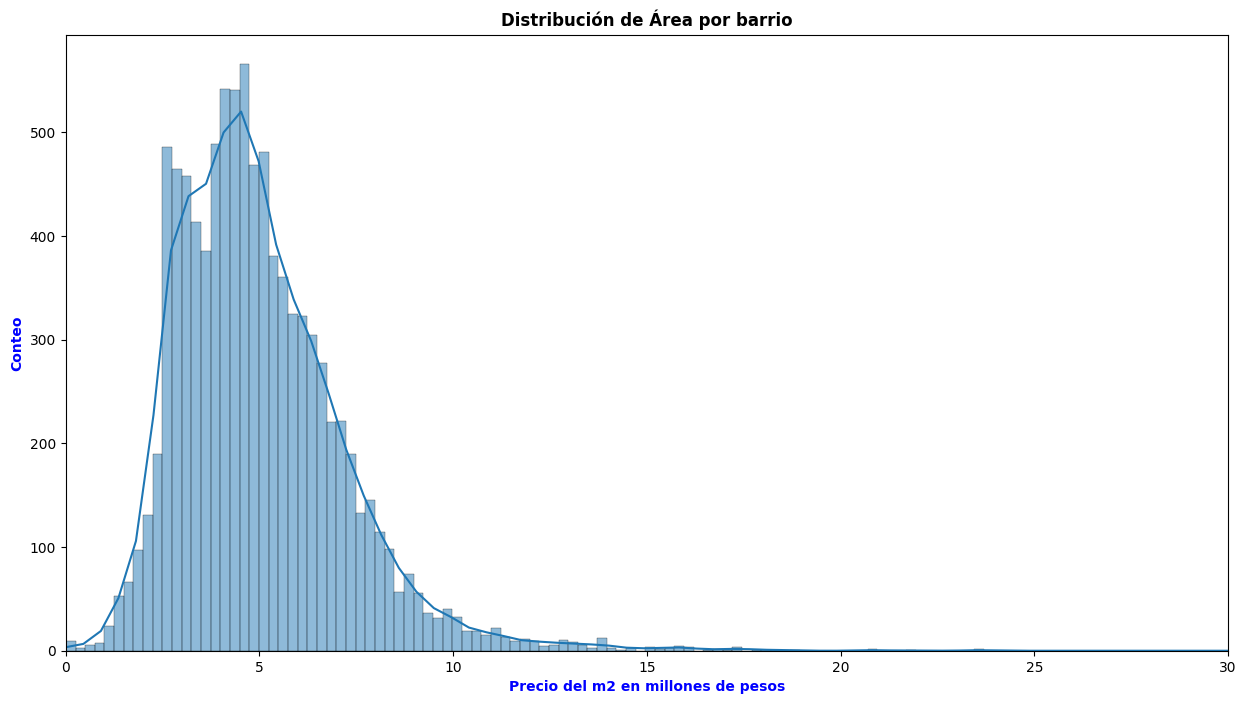

In [ ]:
plt.figure(figsize=(15,8))
grafica = sns.histplot(data=inmuebles, x='Precio_m2', kde=True)
grafica.set_title('Distribución de Área por barrio', fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel('Precio del m2 en millones de pesos', color = 'blue', fontweight = 'bold')
ax.set_ylabel('Conteo', color = 'blue', fontweight = 'bold')
plt.xlim((0,30))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles3.png', format='png')
plt.show()

In [ ]:
barrio_area_graf = inmuebles[['Barrio', 'Precio_m2']]
barrio_area_graf

,Barrio,Precio_m2
0,Zona Noroccidental,5.14
1,Castilla,3.94
2,Chico Reservado,7.78
3,Usaquén,5.78
4,Bella Suiza,7.58
...,...,...
9515,Kennedy,4.14
9516,Parque Central Bavaria,6.70
9517,Restrepo,2.35
9518,Engativa,1.83


In [ ]:
barrio_area_graf = inmuebles[['Barrio', 'Precio_m2']].groupby('Barrio').mean()
barrio_area_graf.sort_values('Precio_m2')

,Precio_m2
Barrio,
Bosa Piamonte,1.18
Roma,1.35
Libertador,1.66
Las Ferias,1.72
Santa Librada,1.95
...,...
Los Rosales,8.17
Chico Norte,8.54
La Merced,8.98


<Axes: xlabel='Barrio'>

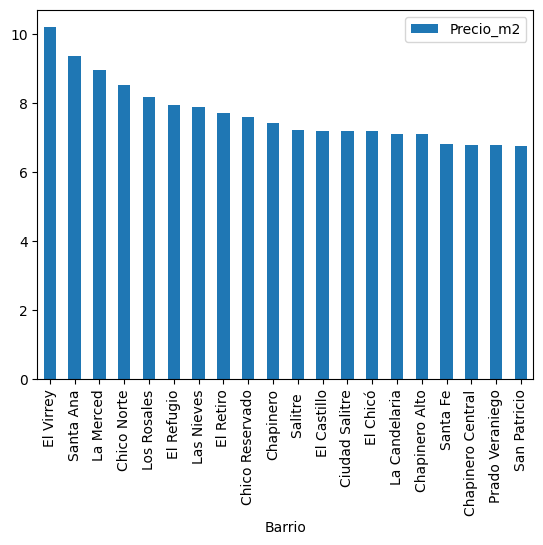

In [ ]:
barrio_area_graf.sort_values('Precio_m2',ascending=False).head(20).plot.bar()

<Axes: xlabel='Barrio'>

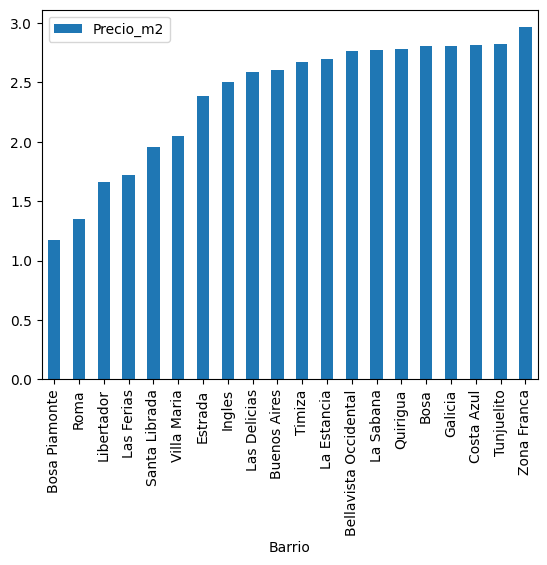

In [ ]:
barrio_area_graf.sort_values('Precio_m2',ascending=True).head(20).plot.bar()

No es muy aconcejable está forma de hacerlo debido a que el valor promedio se toma en relación a todos los datos que componen el dataframe. Lo mejor es hacerlo como se muestra a continuación, esto es primero hacer la suma de todos los valores numéricos de las columnas agrupados por barrio y posteriormente hacer la división.

In [ ]:
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

,Habitaciones,Banos,Area,Precio_Millones,Precio_m2
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [ ]:
datos_barrio['Valor_m2_barrio'] = datos_barrio['Precio_Millones']/datos_barrio['Area']
datos_barrio 

,Habitaciones,Banos,Area,Precio_Millones,Precio_m2,Valor_m2_barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


Para reemplazar los valores de cáculo de precio de metro cuadrado por barrio, en el dataframe principa, podemos hecer lo siguiente:

In [ ]:
m2_barrio = dict(datos_barrio['Valor_m2_barrio'])

In [ ]:
inmuebles['Valor_m2_barrio'] = inmuebles['Barrio']
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones,Precio_m2,Valor_m2_barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,Zona Noroccidental
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,Castilla
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,Chico Reservado
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,Usaquén
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,Bella Suiza


En el paso anterior asigno el nombre del barrio a la columna Valor_m2_barrio, esto con el fin de que se convierta en la key que va entrar a buscar en el diccionario que cree con los precios por m2 en la variable m2_barrio. Después de hacer esto reemplazo los valores de barrio con el valor numérico utilizando un mapeo como se ve a continuación.
Observación: Van a quedar valores repetidos en los barrios que sean iguales

In [ ]:
inmuebles['Valor_m2_barrio']=inmuebles['Valor_m2_barrio'].map(m2_barrio)
inmuebles

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones,Precio_m2,Valor_m2_barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00,4.14,3.38
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00,6.70,6.11
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,900.00,2.35,2.92
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00,1.83,2.89


In [ ]:
inmuebles['Barrio'].value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

Haciendo enfasis en los diez barrios con más inmuebles

In [ ]:
top_barrios = inmuebles['Barrio'].value_counts()[0:10].index

In [ ]:
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [ ]:
datos_barrio

,Habitaciones,Banos,Area,Precio_Millones,Precio_m2,Valor_m2_barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


En datos_barrio (linea anterior de código) se observa que la columna Barrio es el indice de ese dataframe, vamos a convertirla en una columna después de otra columna que tenga el indice numérico

In [ ]:
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Millones,Precio_m2,Valor_m2_barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


Ahora podemos hacer una consulta a nuestro dataframe de arriba, por ejemplo una consulta que muestra los datos del top 10 de barrios con más inmuebles:

In [ ]:
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Millones,Precio_m2,Valor_m2_barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


Para interpretar estos datos obtenidos en la linea de código anterior vamos a graficar. Lo primero es creqar nuestro "lienzo" de gráfica

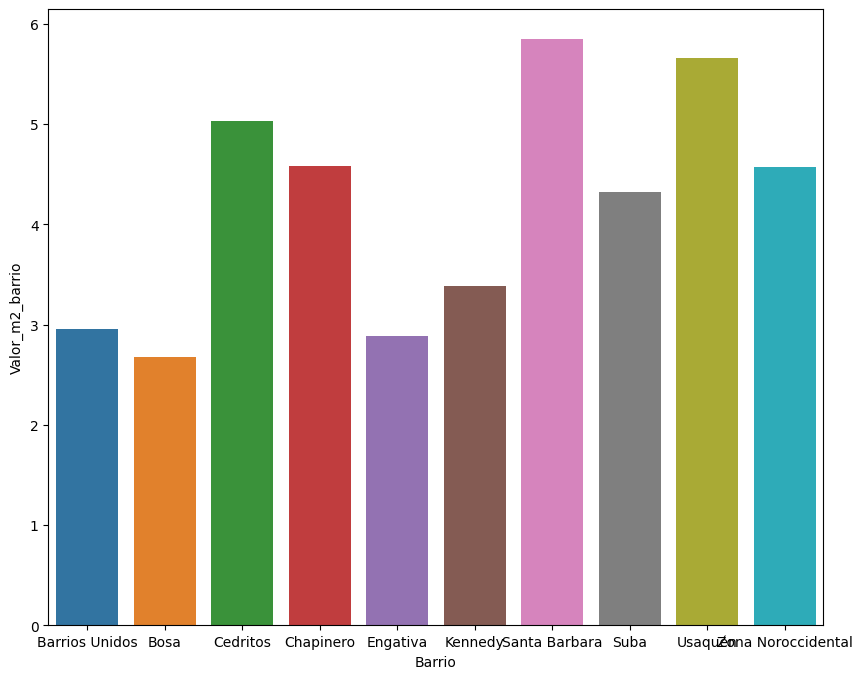

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Barrio', y='Valor_m2_barrio', data = datos_barrio.query('Barrio in @top_barrios'))

Ajustando nuestro gráfico:

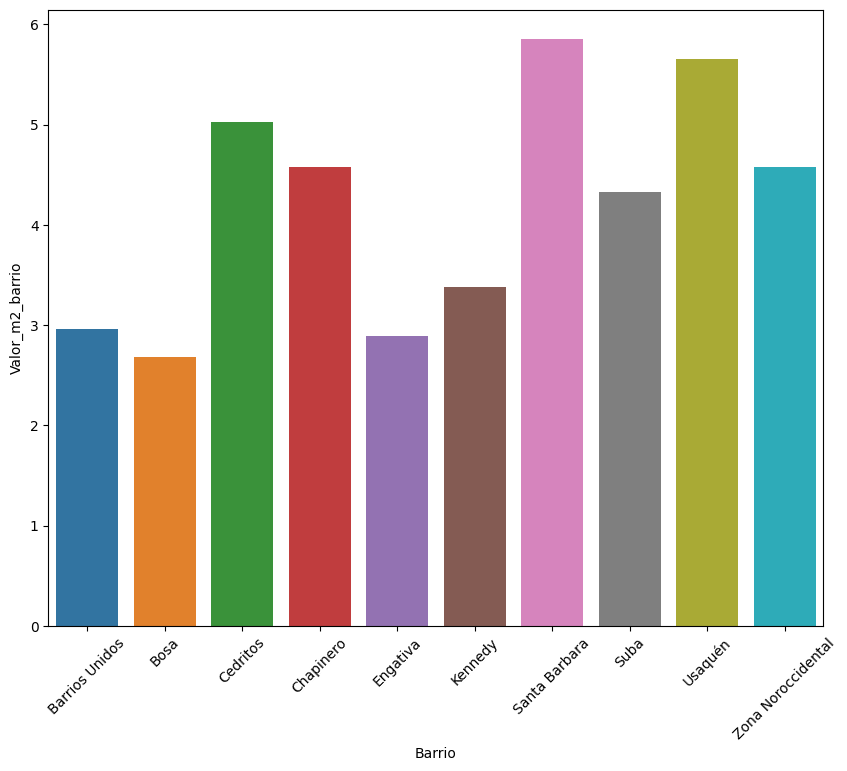

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Barrio', y='Valor_m2_barrio', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation = 45)

##Boxplot
Nos muestra el valor mínimo y máximo en cada uno de los extremos de cada barra, en la mitad la caja de color, en la parte inferior representa el primer cuartil (25%), la mitad de la caja de color es la mediana o segundo cuartil (50%) y la parte superior es el tercer cuartil (75%). 
En este gráfico automáticamente se excluyen los valores que están muy por encima de lo que se tiene en los datos de manera general, por eso tenemos esos puntos negros es la parte superior de la tabla.

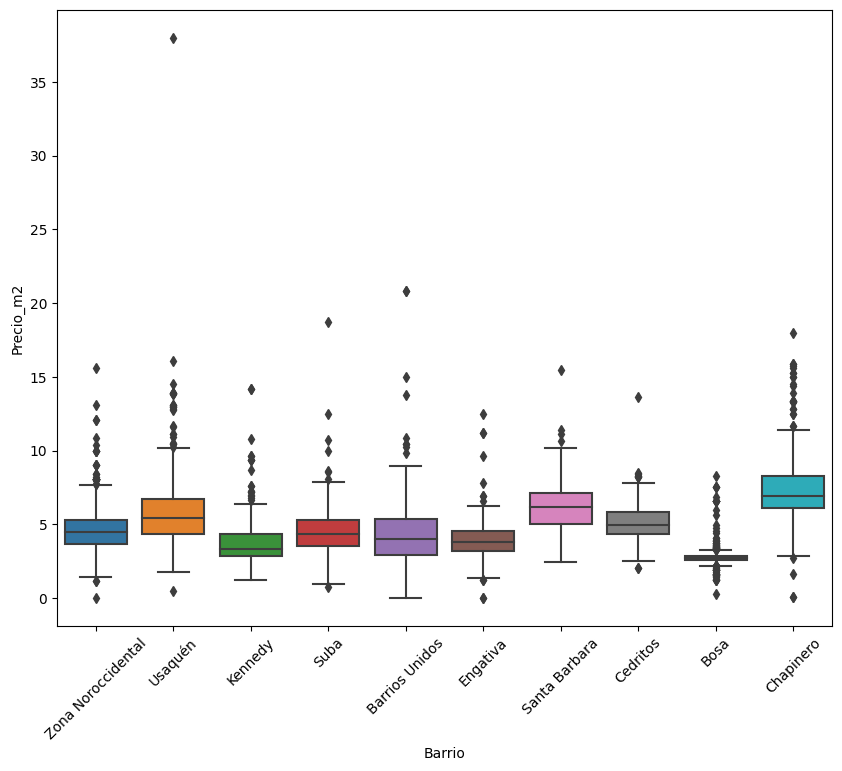

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_m2', data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation = 45)
plt.show()

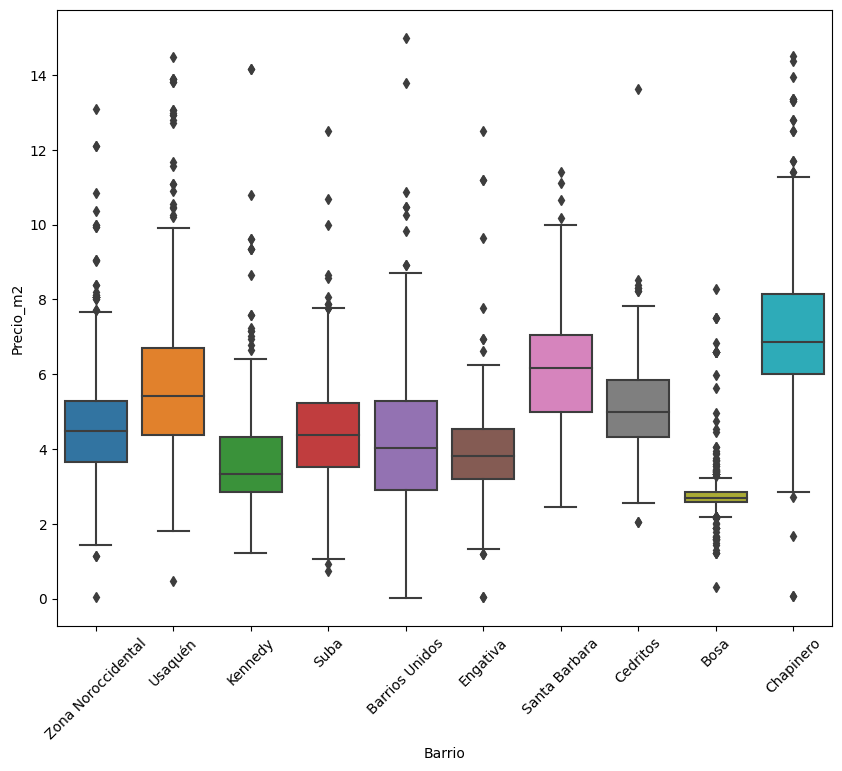

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_m2', data = inmuebles.query('Barrio in @top_barrios & Precio_m2 < 15'))
ax.tick_params(axis='x', rotation = 45)
plt.show()

Boxsplot para el análisis del área

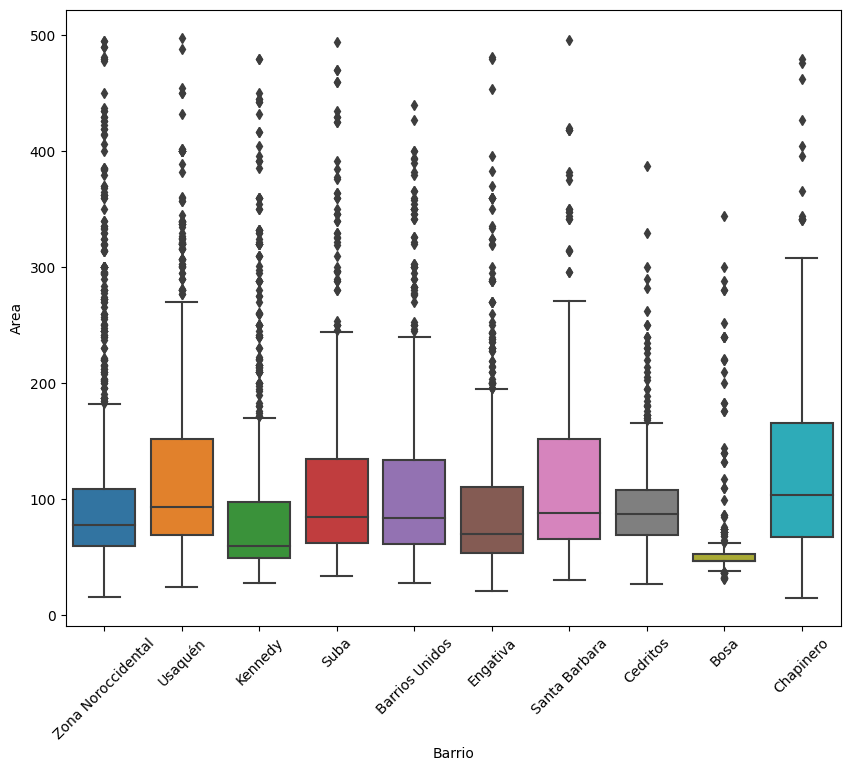

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Area', data = inmuebles.query('Barrio in @top_barrios & Area<500'))
ax.tick_params(axis='x', rotation = 45)
plt.show()

Boxsplot para el precio

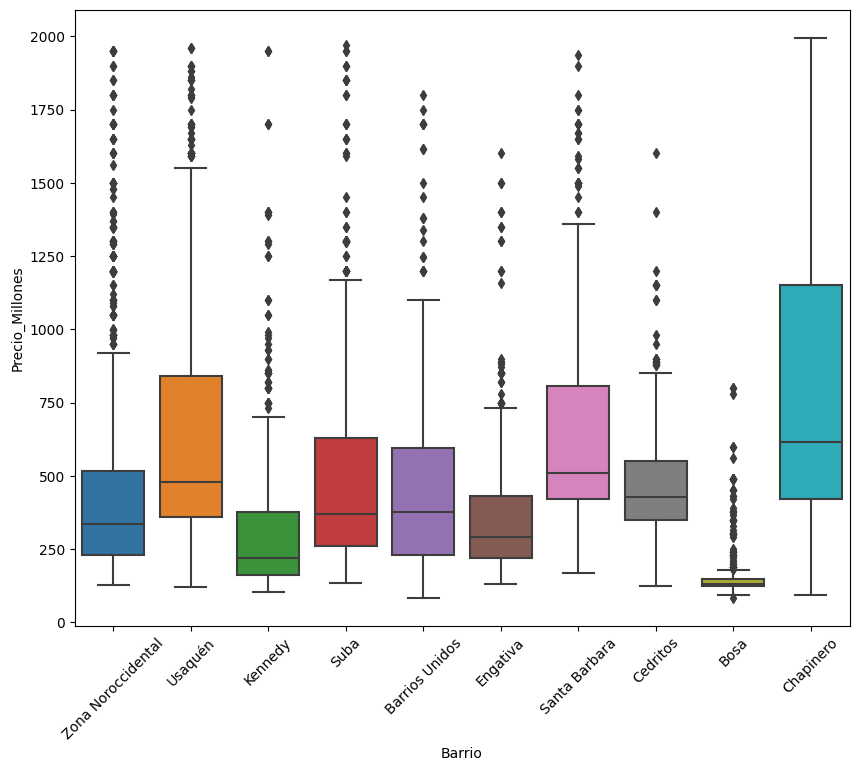

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_Millones', data = inmuebles.query('Barrio in @top_barrios & Precio_Millones<2000'))
ax.tick_params(axis='x', rotation = 45)
plt.show()